In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Đọc dữ liệu từ file
file_path = 'breast-cancer-wisconsin.data'
column_names = ['ID', 'Mitoses', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Class']

# Load dữ liệu
data = pd.read_csv(file_path, header=None, names=column_names)

# Kiểm tra 5 dòng đầu tiên của dữ liệu
data.head()



,ID,Mitoses,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [11]:
# Thay thế tất cả dấu hỏi '?' bằng NaN và sau đó thay thế bằng giá trị trung bình của cột
data.replace('?', float('nan'), inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')
data = data.fillna(data.mean())  # Thay thế giá trị thiếu bằng giá trị trung bình

# Chuyển đổi cột 'Class' thành nhãn nhị phân: 0 (benign), 1 (malignant)
data['Class'] = data['Class'].map({2: int(0), 4: int(1)})

# Tách lại dữ liệu thành các đặc trưng (X) và nhãn (y)
y = data['Class']
X = data.drop(columns=['ID','Class'])  

# Chia lại dữ liệu thành tập huấn luyện và kiểm tra (80% huấn luyện, 20% kiểm tra)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kiểm tra lại kích thước của dữ liệu sau khi chia
X_train.shape, X_test.shape
# print(X.head())
# print(y.head(100))

((559, 9), (140, 9))

Accuracy: 0.9642857142857143
Precision: 0.9166666666666666, Recall: 0.9777777777777777


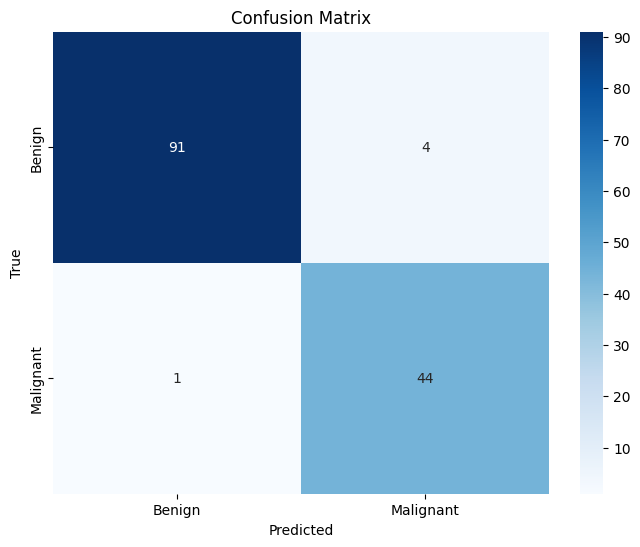

In [12]:
# Khởi tạo mô hình Gaussian Naive Bayes
gnb_model = GaussianNB()

# Huấn luyện mô hình trên dữ liệu huấn luyện
gnb_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = gnb_model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}, Recall: {recall}")

# Tính toán confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Vẽ confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()